In [16]:
import numpy as np
import matplotlib.pyplot as plt
import thomsonpy.data_management.formatter as fmt
import thomsonpy.config.paths as paths
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units

In [30]:
prefix = f"../../{paths.MODELS_PATH}"
model50_32 = fmt.load(f"{prefix}50p_allsun_6x6rsol_32s.np")
model50 = fmt.load(f"{prefix}50p_allsun_6x6rsol_16s.np")
model100_32 = fmt.load(f"{prefix}100p_allsun_6x6rsol_32s.np")
model100 = fmt.load(f"{prefix}100p_allsun_6x6rsol_16s.np")
model256 = fmt.load(f"{prefix}256p_allsun_6x6rsol_16s.np")
model512 = fmt.load(f"{prefix}512p_allsun_6x6rsol_16s.np")
model550 = fmt.load(f"{prefix}550p_allsun_6x6rsol_16s.np")
model1024 = fmt.load(f"{prefix}1024p_allsun_6x6rsol_16s.np")
model84_sinI0 = fmt.load(f"{prefix}allsun_6x6rsol_84p_16s_sinI0.np")
model100_sinI0 = fmt.load(f"{prefix}allsun_6x6rsol_100p_16s_sinI0.np")
model550_sinI0 = fmt.load(f"{prefix}allsun_6x6rsol_550p_16s_sinI0.np")

/tmp/ipykernel_11318/2281351103.py:36: RuntimeWarning: divide by zero encountered in log
  model_log = np.log(m)


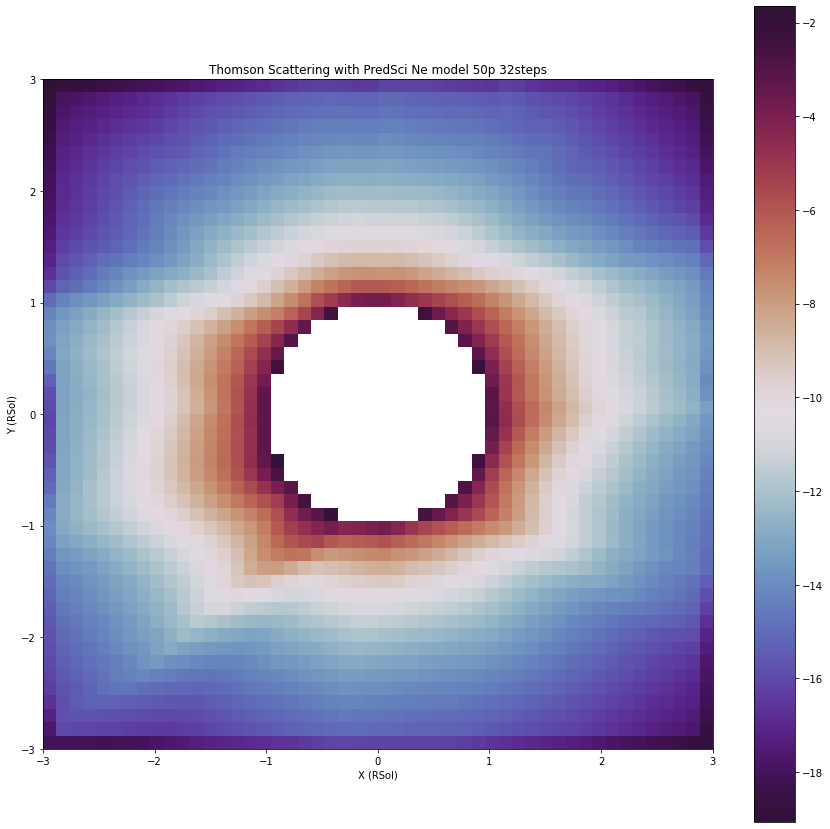

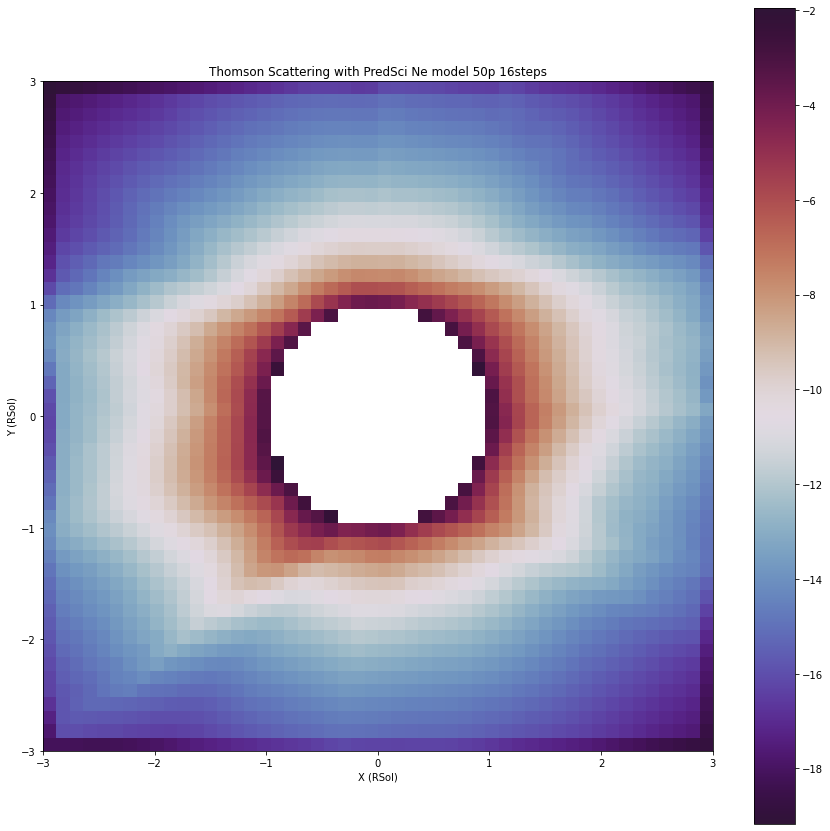

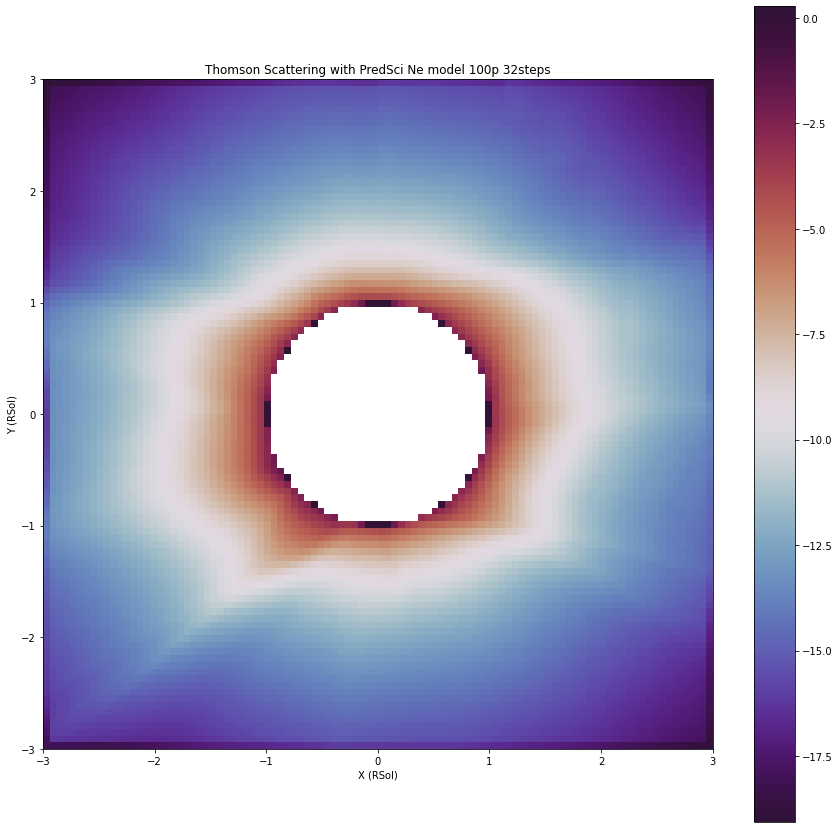

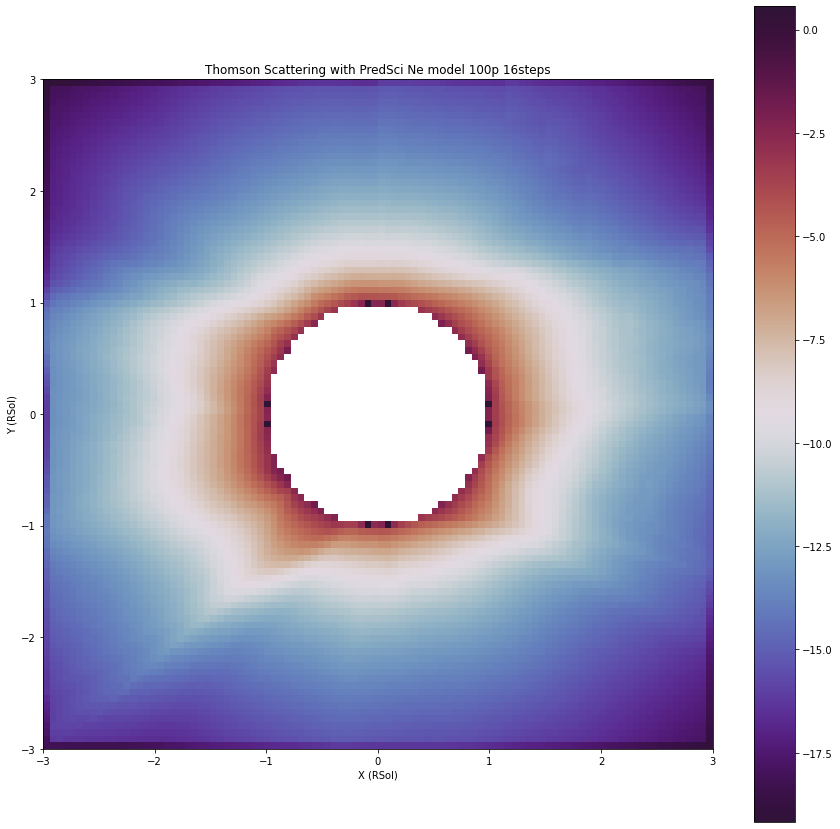

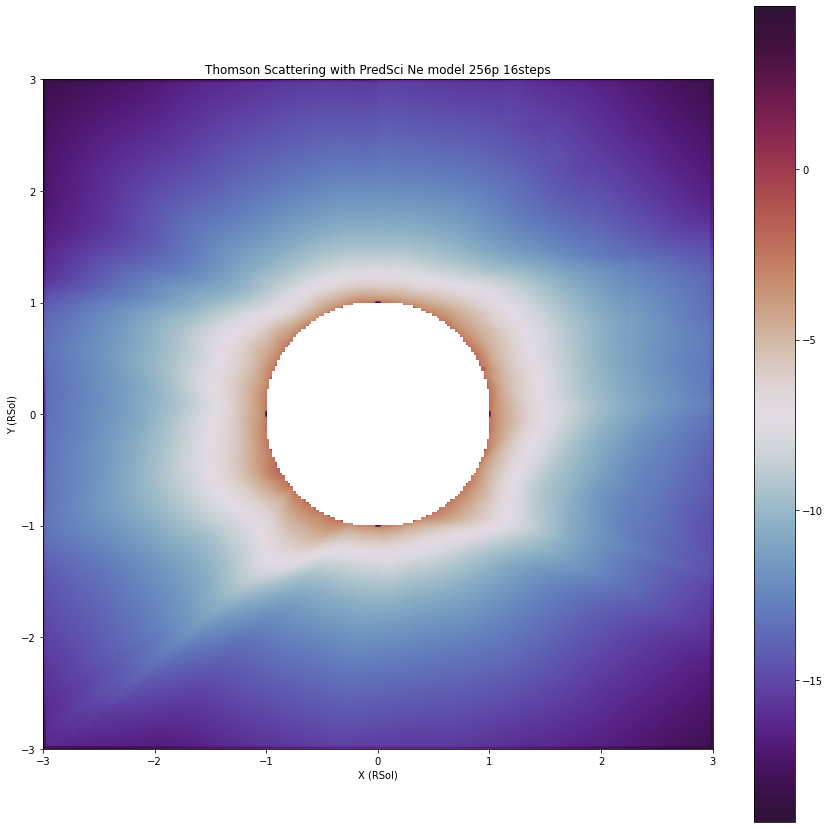

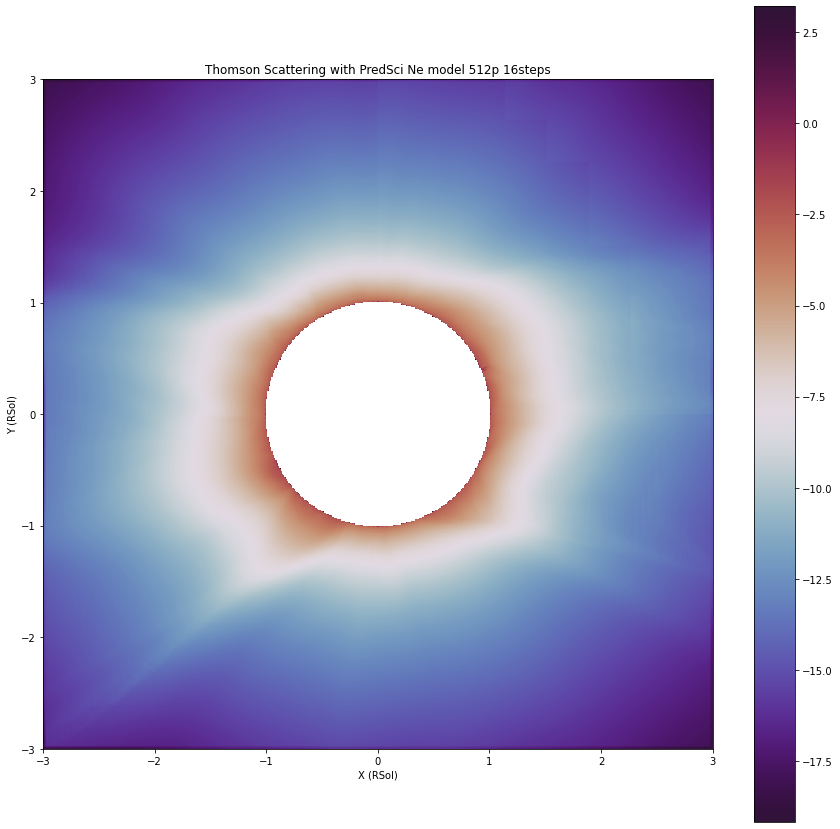

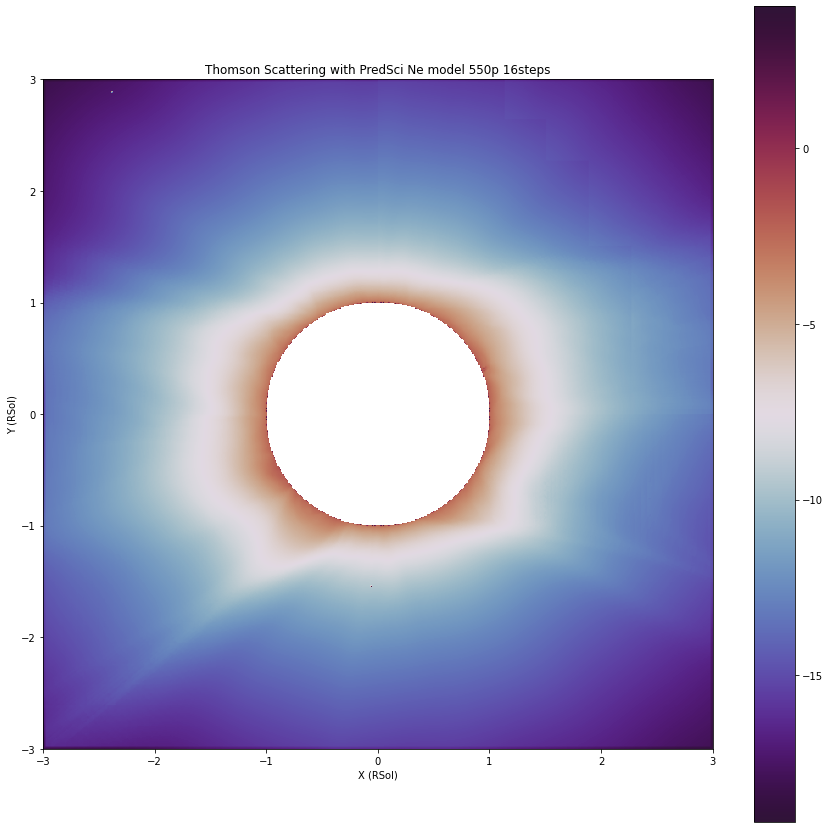

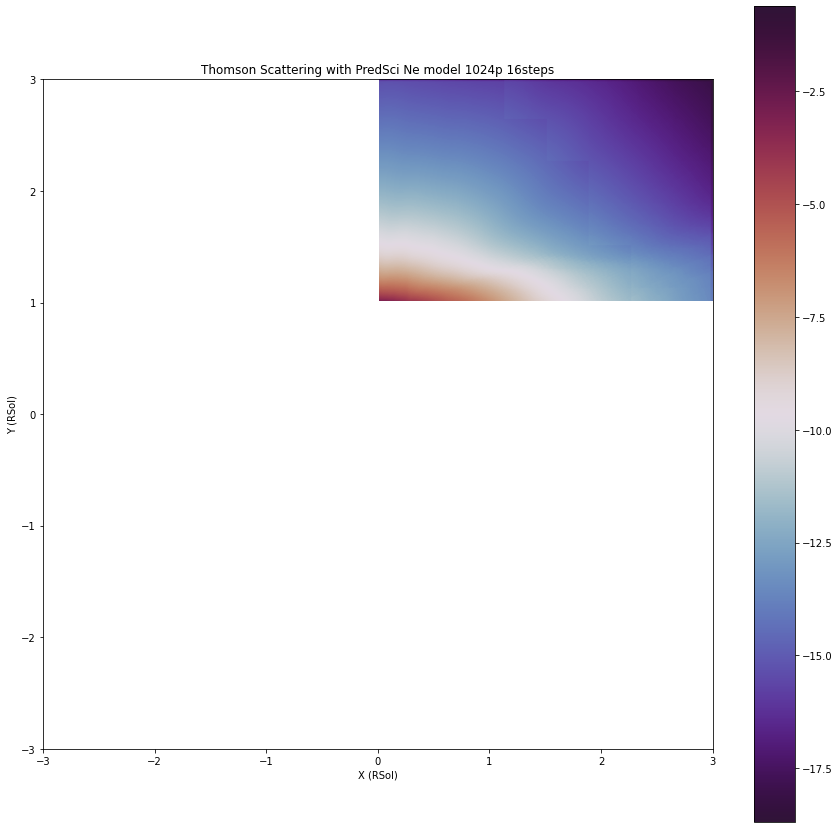

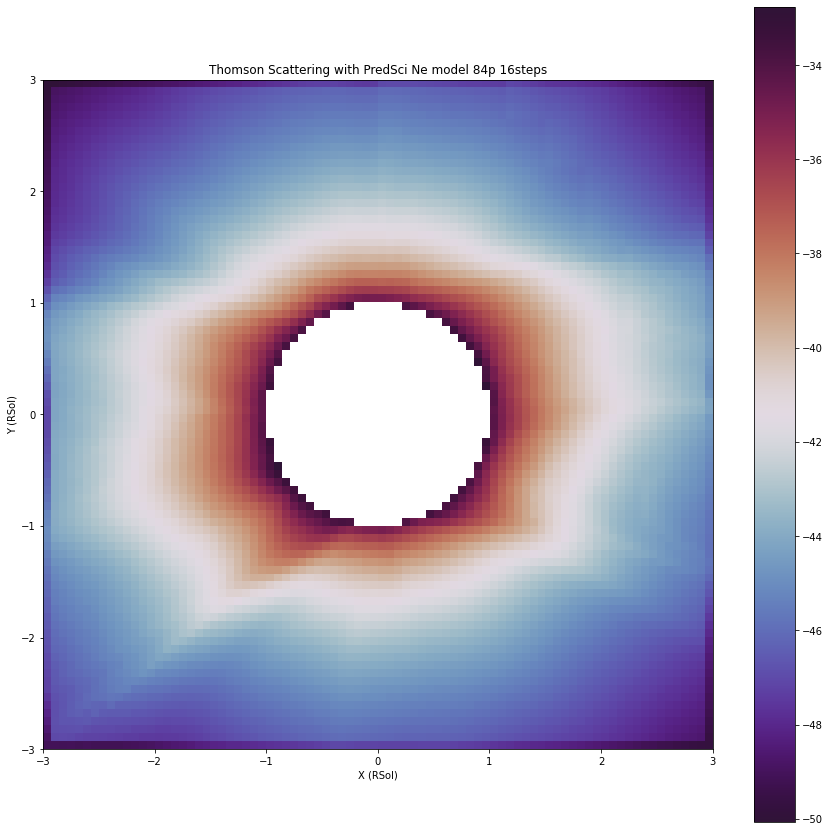

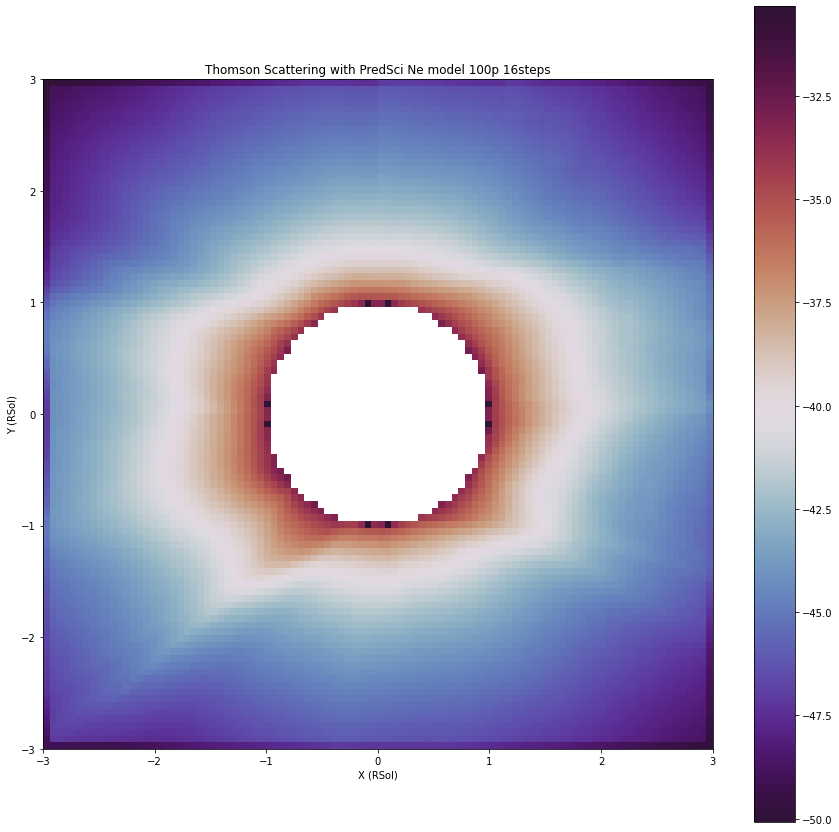

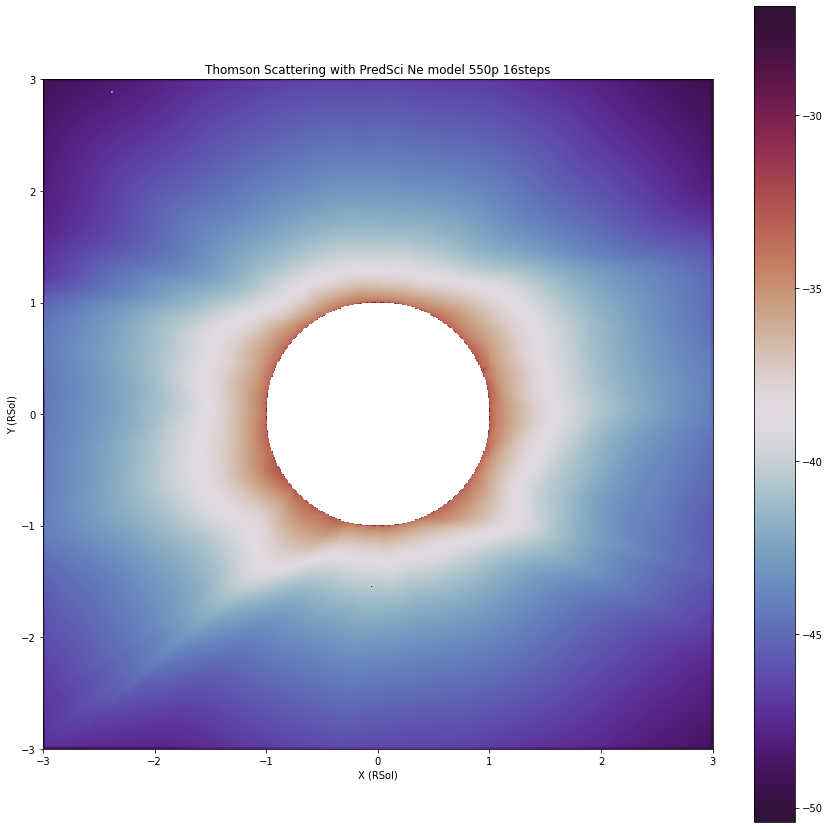

In [31]:
"""
Visualization of the ThomsonScattering.
"""
"""
cmap
['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight', 'twilight_shifted', 'bone']
"""

"""
interpolation
'none', 'antialiased', 'nearest', 'bilinear', 
'bicubic', 'spline16', 'spline36', 'hanning', 
'hamming', 'hermite', 'kaiser', 'quadric', 
'catrom', 'gaussian', 'bessel', 'mitchell', 
'sinc', 'lanczos', 'blackman'

"""

"""
interpolation_stage{'data', 'rgba'}, default: 'data'
"""
#points = [50, 100, 256, 512, 550, 1024, 84, 100, 550]
#models = [model50, model100, model256, model512, model550, model1024, model84_sinI0, model100_sinI0, model550_sinI0]
steps = [32, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16]
points = [50, 50, 100, 100, 256, 512, 550, 1024, 84, 100, 550]
models = [model50_32, model50, model100_32, model100, model256, model512, model550, model1024, model84_sinI0, model100_sinI0, model550_sinI0]

for i in range(len(models)):
    m = models[i]
    p = points[i]
    s = steps[i]
    plt.figure(figsize=(15, 15))
    plt.title(f"Thomson Scattering with PredSci Ne model {p}p {s}steps")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    model_log = np.log(m)
    plt.imshow(model_log, 
               cmap = 'twilight_shifted', 
               interpolation = 'antialiased',
               interpolation_stage = 'data',
               extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

In [15]:
"""
Models comparison
"""
def imshow_model(model, description, ax, fig, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
                                  
    im = ax.imshow(model, **kwargs)

    ax.set_xlabel(f" X [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_ylabel(f" Y [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_title(description)

    #ax.legend()
    fig.colorbar(im, cax = cax, orientation = 'vertical')